In [1]:
import pandas as pd
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import torch

In [2]:
df_action_features = pd.read_csv("../data/MOOC/raw/mooc_action_features.tsv",sep="\t")
df_action_labels = pd.read_csv("../data/MOOC/raw/mooc_action_labels.tsv",sep="\t")
df_actions = pd.read_csv("../data/MOOC/raw/mooc_actions.tsv",sep="\t")
df_actions_merged = pd.merge(df_actions, df_action_features, on="ACTIONID")
df_actions_merged = pd.merge(df_actions_merged, df_action_labels, on="ACTIONID")
df_actions_merged.columns = df_actions_merged.columns.str.lower()
df_actions_merged

,actionid,userid,targetid,timestamp,feature0,feature1,feature2,feature3,label
0,0,0,0,0.0,-0.319991,-0.435701,0.106784,-0.067309,0
1,1,0,1,6.0,-0.319991,-0.435701,0.106784,-0.067309,0
2,2,0,2,41.0,-0.319991,-0.435701,0.106784,-0.067309,0
3,3,0,1,49.0,-0.319991,-0.435701,0.106784,-0.067309,0
4,4,0,2,51.0,-0.319991,-0.435701,0.106784,-0.067309,0
...,...,...,...,...,...,...,...,...,...
411744,411744,7026,8,2572041.0,-0.319991,-0.435701,0.106784,-0.067309,0
411745,411745,6842,8,2572043.0,-0.319991,-0.435701,0.106784,-0.067309,0
411746,411746,7026,9,2572048.0,-0.319991,-0.435701,0.106784,-0.067309,0
411747,411747,6842,5,2572054.0,-0.319991,-0.435701,0.106784,-0.067309,0


In [3]:
# indexing data
user_ids = df_actions_merged['userid'].unique()
target_ids = df_actions_merged['targetid'].unique()
user_id2idx = {uid: idx for idx, uid in enumerate(user_ids)}
target_id2idx = {tid: idx + len(user_ids) for idx, tid in enumerate(target_ids)}
df_actions_merged['source_idx'] = df_actions_merged['userid'].map(user_id2idx)
df_actions_merged['target_idx'] = df_actions_merged['targetid'].map(target_id2idx)

In [4]:
max_timestamp = max(df_actions_merged['timestamp'])
print(f"max timestamp:{max_timestamp} seconds, {max_timestamp/(3600*24)}")

max timestamp:2572086.0 seconds, 29.769513888888888


In [5]:
df_actions_merged["datetime"] = pd.to_datetime(df_actions_merged["timestamp"], unit='s')
start = df_actions_merged["datetime"].min()
df_actions_merged["day_group"] = ((df_actions_merged["datetime"] - start).dt.total_seconds() // 86400).astype(int)
df_actions_merged


,actionid,userid,targetid,timestamp,feature0,feature1,feature2,feature3,label,source_idx,target_idx,datetime,day_group
0,0,0,0,0.0,-0.319991,-0.435701,0.106784,-0.067309,0,0,7047,1970-01-01 00:00:00,0
1,1,0,1,6.0,-0.319991,-0.435701,0.106784,-0.067309,0,0,7048,1970-01-01 00:00:06,0
2,2,0,2,41.0,-0.319991,-0.435701,0.106784,-0.067309,0,0,7049,1970-01-01 00:00:41,0
3,3,0,1,49.0,-0.319991,-0.435701,0.106784,-0.067309,0,0,7048,1970-01-01 00:00:49,0
4,4,0,2,51.0,-0.319991,-0.435701,0.106784,-0.067309,0,0,7049,1970-01-01 00:00:51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411744,411744,7026,8,2572041.0,-0.319991,-0.435701,0.106784,-0.067309,0,7026,7055,1970-01-30 18:27:21,29
411745,411745,6842,8,2572043.0,-0.319991,-0.435701,0.106784,-0.067309,0,6842,7055,1970-01-30 18:27:23,29
411746,411746,7026,9,2572048.0,-0.319991,-0.435701,0.106784,-0.067309,0,7026,7056,1970-01-30 18:27:28,29
411747,411747,6842,5,2572054.0,-0.319991,-0.435701,0.106784,-0.067309,0,6842,7052,1970-01-30 18:27:34,29


In [11]:
df_actions_merged['label'].value_counts(normalize=True)


label
0    0.990125
1    0.009875
Name: proportion, dtype: float64

In [31]:
label_counts = df_actions_merged.groupby(["day_group", "label"]).size().unstack(fill_value=0)
label_counts

label,0,1
day_group,,
0,4925,28
1,17735,177
2,15181,164
3,12406,135
4,10921,133
5,8444,126
6,7220,81
7,8137,118
8,15337,152


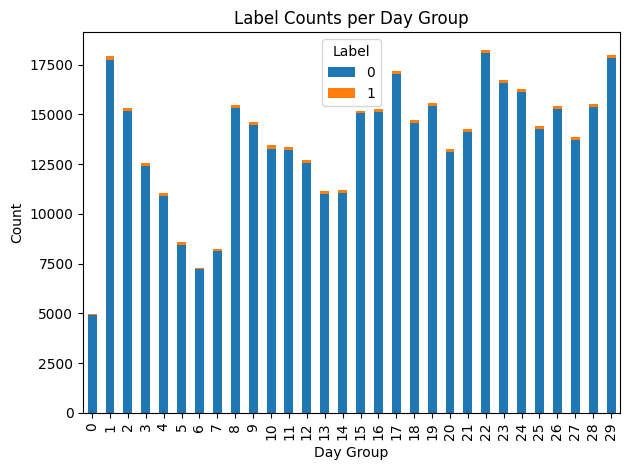

In [32]:
label_counts.plot(kind="bar", stacked=True)
plt.title("Label Counts per Day Group")
plt.xlabel("Day Group")
plt.ylabel("Count")
plt.legend(title="Label")
plt.tight_layout()
plt.show()

In [37]:
print(len(user_id2idx))
print(len(target_id2idx))

7047
97


In [40]:
data_list = []
num_nodes = len(user_id2idx) + len(target_id2idx)
for group_id, group in df_actions_merged.groupby("day_group"):
    data = Data()
    data.x = torch.ones((num_nodes,1),dtype=torch.float)
    data.edge_index = torch.tensor(group[['source_idx','target_idx']].values.T,dtype=torch.long)
    data.y = y = torch.tensor(group['label'].values, dtype=torch.float)
    data.edge_attr = torch.tensor(group[['feature0', 'feature1', 'feature2', 'feature3']].values, dtype=torch.float)
    print(data)

Data(x=[7144, 1], edge_index=[2, 4953], y=[4953], edge_attr=[4953, 4])
Data(x=[7144, 1], edge_index=[2, 17912], y=[17912], edge_attr=[17912, 4])
Data(x=[7144, 1], edge_index=[2, 15345], y=[15345], edge_attr=[15345, 4])
Data(x=[7144, 1], edge_index=[2, 12541], y=[12541], edge_attr=[12541, 4])
Data(x=[7144, 1], edge_index=[2, 11054], y=[11054], edge_attr=[11054, 4])
Data(x=[7144, 1], edge_index=[2, 8570], y=[8570], edge_attr=[8570, 4])
Data(x=[7144, 1], edge_index=[2, 7301], y=[7301], edge_attr=[7301, 4])
Data(x=[7144, 1], edge_index=[2, 8255], y=[8255], edge_attr=[8255, 4])
Data(x=[7144, 1], edge_index=[2, 15489], y=[15489], edge_attr=[15489, 4])
Data(x=[7144, 1], edge_index=[2, 14624], y=[14624], edge_attr=[14624, 4])
Data(x=[7144, 1], edge_index=[2, 13456], y=[13456], edge_attr=[13456, 4])
Data(x=[7144, 1], edge_index=[2, 13387], y=[13387], edge_attr=[13387, 4])
Data(x=[7144, 1], edge_index=[2, 12698], y=[12698], edge_attr=[12698, 4])
Data(x=[7144, 1], edge_index=[2, 11142], y=[11142]